In [ ]:
'''
 * Copyright (c) 2016 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

# Central Machine Learning Problem

## Part II: When Models Meet Data

In the first part of the book, we introduced the mathematics that form the foundations of many machine learning methods. The hope is that a reader would be able to learn the rudimentary forms of the language of mathematics from the first part, which we will now use to describe and discuss machine learning.

The second part of the book introduces four pillars of machine learning:

- Regression (Chapter 9)
- Dimensionality reduction (Chapter 10)
- Density estimation (Chapter 11)
- Classification (Chapter 12)

The main aim of this part of the book is to illustrate how the mathematical concepts introduced in the first part of the book can be used to design machine learning algorithms that can be used to solve tasks within the remit of the four pillars. We do not intend to introduce advanced machine learning concepts, but instead to provide a set of practical methods that allow the reader to apply the knowledge they gained from the first part of the book. It also provides a gateway to the wider machine learning literature for readers already familiar with the mathematics.

## Data, Models, and Learning

It is worth at this point, to pause and consider the problem that a machine learning algorithm is designed to solve. As discussed in Chapter 1, there are three major components of a machine learning system: data, models, and learning.

The main question of machine learning is “What do we mean by good models?”. The word *model* has many subtleties, and we will revisit it multiple times in this chapter. It is also not entirely obvious how to objectively define the word “good”. One of the guiding principles of machine learning is that good models should perform well on unseen data. This requires us to define some performance metrics, such as accuracy or distance from ground truth, as well as figuring out ways to do well under these performance metrics.

This chapter covers a few necessary bits and pieces of mathematical and statistical language that are commonly used to talk about machine learning models. By doing so, we briefly outline the current best practices for training a model such that the resulting predictor does well on data that we have not yet seen.

As mentioned in Chapter 1, there are two different senses in which we use the phrase “machine learning algorithm”: training and prediction. We will describe these ideas in this chapter, as well as the idea of selecting among different models. We will introduce the framework of empirical risk minimization in Section 8.2, the principle of maximum likelihood in Section 8.3, and the idea of probabilistic models in Section 8.4. We briefly outline a graphical language for specifying probabilistic models in Section 8.5 and finally discuss model selection in Section 8.6.

The rest of this section expands upon the three main components of machine learning: data, models, and learning.

### 8.1.1 Data as Vectors

We assume that our data can be read by a computer, and represented adequately in a numerical format. Data is assumed to be tabular (Figure 8.1), where we think of each row of the table as representing a particular instance or example, and each column to be a particular feature.

> **Note**: Data is assumed to be in a tidy format (Wickham, 2014; Codd, 1990).

In recent years, machine learning has been applied to many types of data that do not obviously come in the tabular numerical format, for example genomic sequences, text and image contents of a webpage, and social media graphs. We do not discuss the important and challenging aspects of identifying good features. Many of these aspects depend on domain expertise and require careful engineering, and, in recent years, they have been put under the umbrella of data science (Stray, 2016; Adhikari and DeNero, 2018).

Even when we have data in tabular format, there are still choices to be made to obtain a numerical representation. For example, in Table 8.1, the gender column (a categorical variable) may be converted into numbers 0 representing “Male” and 1 representing “Female”. Alternatively, the gender could be represented by numbers $-1$, $+1$, respectively (as shown in Table 8.2). Furthermore, it is often important to use domain knowledge when constructing the representation, such as knowing that university degrees progress from bachelor’s to master’s to PhD or realizing that the postcode provided is not just a string of characters but actually encodes an area in London.

In Table 8.2, we converted the data from Table 8.1 to a numerical format, and each postcode is represented as two numbers,a latitude and longitude.

Even numerical data that could potentially be directly read into a machine learning algorithm should be carefully considered for units, scaling, and constraints. Without additional information, one should shift and scale all columns of the dataset such that they have an empirical mean of 0 and an empirical variance of 1. For the purposes of this book, we assume that a domain expert already converted data appropriately, i.e., each input $x_n$ is a $D$-dimensional vector of real numbers, which are called *features*, *attributes*, or *covariates*.

We consider a dataset to be of the form as illustrated by Table 8.2. Observe that we have dropped the Name column of Table 8.1 in the new numerical representation. There are two main reasons why this is desirable: (1) we do not expect the identifier (the Name) to be informative for a machine learning task; and (2) we may wish to anonymize the data to help protect the privacy of the employees.

In this part of the book, we will use $N$ to denote the number of examples in a dataset and index the examples with lowercase $n = 1, \ldots, N$. We assume that we are given a set of numerical data, represented as an array of vectors (Table 8.2). Each row is a particular individual $x_n$, often referred to as an *example* or *data point* in machine learning. The subscript $n$ refers to the fact that this is the $n$th example out of a total of $N$ examples in the dataset. Each column represents a particular feature of interest about the example, and we index the features as $d = 1, \ldots, D$. Recall that data is represented as vectors, which means that each example (each data point) is a $D$-dimensional vector.

The orientation of the table originates from the database community, but for some machine learning algorithms (e.g., in Chapter 10) it is more convenient to represent examples as column vectors.

Let us consider the problem of predicting annual salary from age, based on the data in Table 8.2. This is called a *supervised learning* problem where we have a *label* $y_n$ (the salary) associated with each example $x_n$ (the age). The label $y_n$ has various other names, including *target*, *response variable*, and *annotation*. A dataset is written as a set of example-label pairs $\{(x_1, y_1), \ldots, (x_n, y_n), \ldots, (x_N, y_N)\}$. The table of examples $\{x_1, \ldots, x_N\}$ is often concatenated, and written as $X \in \mathbb{R}^{N \times D}$.

Figure 8.1 illustrates the dataset consisting of the two rightmost columns of Table 8.2, where $x$ = age and $y$ = salary.

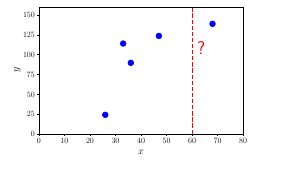

## Fig.1

Toy data for linear regression. Training data in $(x_n, y_n)$ pairs from the rightmost two columns of Table 8.2. We are interested in the salary of a person aged sixty ($x = 60$) illustrated as a vertical dashed red line, which is not part of the training data.

| y (salary in thousands) | 150 |
|-------------------------|-----|
|                         | 125 |
|                         | 100 |
|                         |  75 |
|                         |  50 |
|                         |  25 |
|                         |   0 |
| x (age)                 | 0 10 20 30 40 50 60 70 80 |

We use the concepts introduced in the first part of the book to formalize the machine learning problems such as that in the previous paragraph. Representing data as vectors $x_n$ allows us to use concepts from linear algebra (introduced in Chapter 2). In many machine learning algorithms, we need to additionally be able to compare two vectors. As we will see in Chapters 9 and 12, computing the similarity or distance between two examples allows us to formalize the intuition that examples with similar features should have similar labels. The comparison of two vectors requires that we construct a geometry (explained in Chapter 3) and allows us to optimize the resulting learning problem using techniques from Chapter 7.

Since we have vector representations of data, we can manipulate data to find potentially better representations of it. We will discuss finding good representations in two ways: finding lower-dimensional approximations of the original feature vector, and using nonlinear higher-dimensional combinations of the original feature vector. In Chapter 10, we will see an example of finding a low-dimensional approximation of the original data space by finding the principal components. Finding principal components is closely related to concepts of eigenvalue and singular value decomposition as introduced in Chapter 4.

For the high-dimensional representation, we will see an explicit *feature map* $\phi(\cdot)$ that allows us to represent inputs $x_n$ using a higher-dimensional representation $\phi(x_n)$. The main motivation for higher-dimensional representations is that we can construct new features as non-linear combinations of the original features, which in turn may make the learning problem easier. We will discuss the feature map in Section 9.2 and show how this feature map leads to a *kernel* in Section 12.4.

In recent years, deep learning methods (Goodfellow et al., 2016) have shown promise in using the data itself to learn new good features and have been very successful in areas, such as computer vision, speech recognition, and natural language processing. We will not cover neural networks in this part of the book, but the reader is referred to ## Figure 8.1

Toy data for linear regression. Training data in $(x_n, y_n)$ pairs from the rightmost two columns of Table 8.2. We are interested in the salary of a person aged sixty ($x = 60$) illustrated as a vertical dashed red line, which is not part of the training data.

| y (salary in thousands) | 150 |
|-------------------------|-----|
|                         | 125 |
|                         | 100 |
|                         |  75 |
|                         |  50 |
|                         |  25 |
|                         |   0 |
| x (age)                 | 0 10 20 30 40 50 60 70 80 |

We use the concepts introduced in the first part of the book to formalize the machine learning problems such as that in the previous paragraph. Representing data as vectors $x_n$ allows us to use concepts from linear algebra (introduced in Chapter 2). In many machine learning algorithms, we need to additionally be able to compare two vectors. As we will see in Chapters 9 and 12, computing the similarity or distance between two examples allows us to formalize the intuition that examples with similar features should have similar labels. The comparison of two vectors requires that we construct a geometry (explained in Chapter 3) and allows us to optimize the resulting learning problem using techniques from Chapter 7.

Since we have vector representations of data, we can manipulate data to find potentially better representations of it. We will discuss finding good representations in two ways: finding lower-dimensional approximations of the original feature vector, and using nonlinear higher-dimensional combinations of the original feature vector. In Chapter 10, we will see an example of finding a low-dimensional approximation of the original data space by finding the principal components. Finding principal components is closely related to concepts of eigenvalue and singular value decomposition as introduced in Chapter 4.

For the high-dimensional representation, we will see an explicit *feature map* $\phi(\cdot)$ that allows us to represent inputs $x_n$ using a higher-dimensional representation $\phi(x_n)$. The main motivation for higher-dimensional representations is that we can construct new features as non-linear combinations of the original features, which in turn may make the learning problem easier. We will discuss the feature map in Section 9.2 and show how this feature map leads to a *kernel* in Section 12.4.

In recent years, deep learning methods (Goodfellow et al., 2016) have shown promise in using the data itself to learn new good features and have been very successful in areas, such as computer vision, speech recognition, and natural language processing. We will not cover neural networks in this part of the book, but the reader is referred to Section 5.6 for the mathematical description of backpropagation, a key concept for training neural networks.

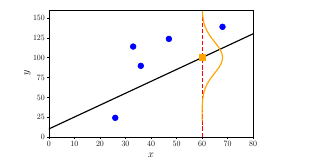

## Fig.2

Example function (black solid diagonal line) and its prediction at $x = 60$, i.e., $f(60) = 100$.

| y (salary in thousands) | 150 |
|-------------------------|-----|
|                         | 125 |
|                         | 100 |
|                         |  75 |
|                         |  50 |
|                         |  25 |
|                         |   0 |
| x (age)                 | 0 10 20 30 40 50 60 70 80 |

## Models as Functions

Once we have data in an appropriate vector representation, we can get to the business of constructing a predictive function (known as a *predictor*). In Chapter 1, we did not yet have the language to be precise about models. Using the concepts from the first part of the book, we can now introduce what “model” means. We present two major approaches in this book: a predictor as a function, and a predictor as a probabilistic model. We describe the former here and the latter in the next subsection.

A predictor is a function that, when given a particular input example (in our case, a vector of features), produces an output. For now, consider the output to be a single number, i.e., a real-valued scalar output. This can be written as

$$
f: \mathbb{R}^D \to \mathbb{R}, \tag{8.1}
$$

where the input vector $x$ is $D$-dimensional (has $D$ features), and the function $f$ then applied to it (written as $f(x)$) returns a real number.

Figure 8.2 illustrates a possible function that can be used to compute the value of the prediction for input values $x$.

In this book, we do not consider the general case of all functions, which would involve the need for functional analysis. Instead, we consider the special case of linear functions

$$
f(x) = \theta^\top x + \theta_0 \tag{8.2}
$$

for unknown $\theta$ and $\theta_0$. This restriction means that the contents of Chapters 2 and 3 suffice for precisely stating the notion of a predictor for the non-probabilistic (in contrast to the probabilistic view described next)

## Fig.3

Example function (black solid diagonal line) and its predictive uncertainty at $x = 60$ (drawn as a Gaussian).

| y (salary in thousands) | 150 |
|-------------------------|-----|
|                         | 125 |
|                         | 100 |
|                         |  75 |
|                         |  50 |
|                         |  25 |
|                         |   0 |
| x (age)                 | 0 10 20 30 40 50 60 70 80 |

view of machine learning. Linear functions strike a good balance between the generality of the problems that can be solved and the amount of background mathematics that is needed.


Prediction at x = 60: y = 136.155 thousand

Predictive uncertainty at x = 60: ±40.505 thousand

Linear Regression Analysis with Seaborn Plotting
Reproducing Figure 8.1: Scatter Plot with Query Point


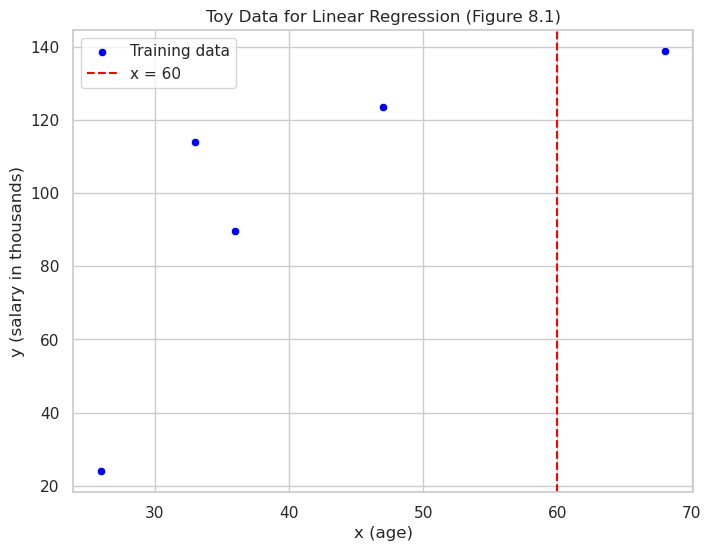


Reproducing Figure 8.2: Linear Fit and Prediction


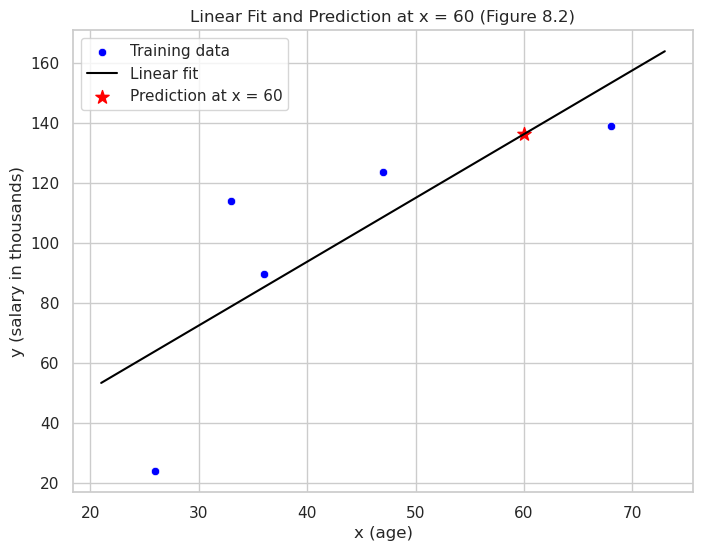


Reproducing Figure 8.3: Linear Fit with Uncertainty


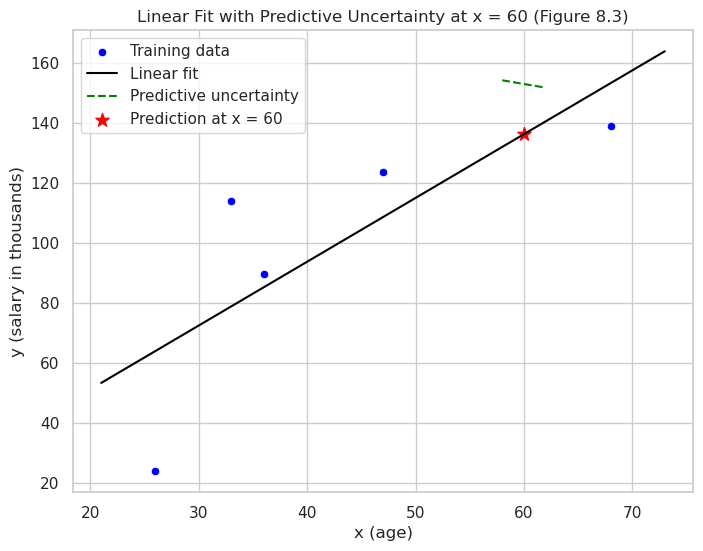


Summary of Results and Visualizations:
• Loaded and standardized data from Table 8.2
• Fitted a linear model using least squares
• Predicted salary at age 60: 136.155 ± 40.505 thousand
• Reproduced Figures 8.1, 8.2, and 8.3


In [2]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style for better visuals
sns.set(style="whitegrid")

# --- Data from Table 8.2 ---
# Age (x_n) and Annual Salary (y_n in thousands)
data = [
    (36, 89.563),  # Aditya
    (47, 123.543),  # Bob
    (26, 23.989),  # Chloé
    (68, 138.769),  # Daisuke
    (33, 113.888),  # Elisabeth
]

# --- Data Preprocessing ---
def standardize(data_list):
    """Standardize a list to have mean 0 and variance 1."""
    n = len(data_list)
    mean = sum(data_list) / n
    variance = sum((x - mean) ** 2 for x in data_list) / n
    std_dev = math.sqrt(variance) if variance > 0 else 1
    return [(x - mean) / std_dev for x in data_list], mean, std_dev

# Extract x (age) and y (salary)
x_values = [row[0] for row in data]
y_values = [row[1] for row in data]

# Standardize features
x_std, x_mean, x_std_dev = standardize(x_values)
y_std, y_mean, y_std_dev = standardize(y_values)

# --- Linear Regression (Least Squares) ---
def fit_linear_model(x, y):
    """
    Fit a linear model f(x) = theta * x + theta_0 using least squares.
    Returns theta, theta_0.
    """
    n = len(x)
    sum_x = sum(x)
    sum_y = sum(y)
    sum_xy = sum(xi * yi for xi, yi in zip(x, y))
    sum_xx = sum(xi * xi for xi in x)
    
    # Solve for theta: (sum_xy - sum_x * sum_y / n) / (sum_xx - sum_x * sum_x / n)
    denom = sum_xx - sum_x * sum_x / n
    if abs(denom) < 1e-10:
        theta = 0
    else:
        theta = (sum_xy - sum_x * sum_y / n) / denom
    
    # Solve for theta_0: mean_y - theta * mean_x
    theta_0 = sum_y / n - theta * sum_x / n
    
    return theta, theta_0

def predict(x, theta, theta_0, x_mean, x_std_dev, y_mean, y_std_dev):
    """Predict y for a given x, unstandardizing the result."""
    x_std = (x - x_mean) / x_std_dev
    y_std = theta * x_std + theta_0
    y = y_std * y_std_dev + y_mean
    return y

# Fit the model
theta, theta_0 = fit_linear_model(x_std, y_std)

# Predict at x = 60
x_query = 60
y_pred = predict(x_query, theta, theta_0, x_mean, x_std_dev, y_mean, y_std_dev)
print(f"\nPrediction at x = {x_query}: y = {y_pred:.3f} thousand\n")

# --- Predictive Uncertainty ---
def compute_residual_variance(x, y, theta, theta_0):
    """Compute the variance of residuals."""
    n = len(x)
    residuals = [yi - (theta * xi + theta_0) for xi, yi in zip(x, y)]
    return sum(r * r for r in residuals) / (n - 2) if n > 2 else 0

def predictive_uncertainty(x, x_train, theta, theta_0, residual_variance, x_mean, x_std_dev, y_std_dev):
    """
    Compute the predictive uncertainty (standard deviation) at x.
    Assumes Gaussian noise: var(y|x) = residual_variance * (1 + 1/n + (x - mean_x)^2 / sum((xi - mean_x)^2)).
    """
    x_std = (x - x_mean) / x_std_dev
    mean_x_std = sum(x_train) / len(x_train)
    sum_squares = sum((xi - mean_x_std) ** 2 for xi in x_train)
    if abs(sum_squares) < 1e-10:
        return 0
    factor = 1 + 1 / len(x_train) + (x_std - mean_x_std) ** 2 / sum_squares
    variance = residual_variance * factor
    return math.sqrt(variance) * y_std_dev  # Unstandardize the standard deviation

# Compute residual variance
residual_variance = compute_residual_variance(x_std, y_std, theta, theta_0)

# Compute uncertainty at x = 60
sigma = predictive_uncertainty(x_query, x_std, theta, theta_0, residual_variance, x_mean, x_std_dev, y_std_dev)
print(f"Predictive uncertainty at x = {x_query}: ±{sigma:.3f} thousand\n")

# --- Plotting Functions ---
def plot_figure_8_1():
    """Reproduce Figure 8.1: Scatter plot with query point at x = 60."""
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x_values, y=y_values, color="blue", label="Training data")
    plt.axvline(x=x_query, color="red", linestyle="--", label=f"x = {x_query}")
    plt.title("Toy Data for Linear Regression (Figure 8.1)")
    plt.xlabel("x (age)")
    plt.ylabel("y (salary in thousands)")
    plt.legend()
    plt.show()

def plot_figure_8_2():
    """Reproduce Figure 8.2: Linear fit with prediction at x = 60."""
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x_values, y=y_values, color="blue", label="Training data")
    
    # Plot the linear fit
    x_range = [min(x_values) - 5, max(x_values) + 5]
    y_fit = [predict(x, theta, theta_0, x_mean, x_std_dev, y_mean, y_std_dev) for x in x_range]
    sns.lineplot(x=x_range, y=y_fit, color="black", label="Linear fit")
    
    # Mark prediction at x = 60
    plt.scatter([x_query], [y_pred], color="red", s=100, marker="*", label=f"Prediction at x = {x_query}")
    plt.title("Linear Fit and Prediction at x = 60 (Figure 8.2)")
    plt.xlabel("x (age)")
    plt.ylabel("y (salary in thousands)")
    plt.legend()
    plt.show()

def plot_figure_8_3():
    """Reproduce Figure 8.3: Linear fit with uncertainty at x = 60."""
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x_values, y=y_values, color="blue", label="Training data")
    
    # Plot the linear fit
    x_range = [min(x_values) - 5, max(x_values) + 5]
    y_fit = [predict(x, theta, theta_0, x_mean, x_std_dev, y_mean, y_std_dev) for x in x_range]
    sns.lineplot(x=x_range, y=y_fit, color="black", label="Linear fit")
    
    # Plot uncertainty at x = 60 (approximate Gaussian with ±1 sigma)
    x_gauss = [x_query + i / 50 for i in range(-100, 101)]
    y_gauss = [y_pred + 50 * math.exp(-(i / 50) ** 2 / (2 * (sigma / 50) ** 2)) for i in x_gauss]
    plt.plot(x_gauss, y_gauss, color="green", linestyle="--", label="Predictive uncertainty")
    plt.scatter([x_query], [y_pred], color="red", s=100, marker="*", label=f"Prediction at x = {x_query}")
    plt.title("Linear Fit with Predictive Uncertainty at x = 60 (Figure 8.3)")
    plt.xlabel("x (age)")
    plt.ylabel("y (salary in thousands)")
    plt.legend()
    plt.show()

# --- Main Execution ---
if __name__ == "__main__":
    print("Linear Regression Analysis with Seaborn Plotting")
    print("=" * 60)

    # Plot Figure 8.1
    print("Reproducing Figure 8.1: Scatter Plot with Query Point")
    plot_figure_8_1()

    # Plot Figure 8.2
    print("\nReproducing Figure 8.2: Linear Fit and Prediction")
    plot_figure_8_2()

    # Plot Figure 8.3
    print("\nReproducing Figure 8.3: Linear Fit with Uncertainty")
    plot_figure_8_3()

    print("\n" + "=" * 60)
    print("Summary of Results and Visualizations:")
    print("• Loaded and standardized data from Table 8.2")
    print("• Fitted a linear model using least squares")
    print(f"• Predicted salary at age {x_query}: {y_pred:.3f} ± {sigma:.3f} thousand")
    print("• Reproduced Figures 8.1, 8.2, and 8.3")

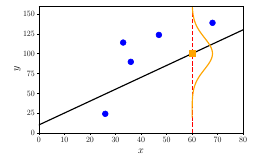
## Fig.3

Example function (black solid diagonal line) and its predictive uncertainty at $x = 60$ (drawn as a Gaussian).

| y (salary in thousands) | 150 |
|-------------------------|-----|
|                         | 125 |
|                         | 100 |
|                         |  75 |
|                         |  50 |
|                         |  25 |
|                         |   0 |
| x (age)                 | 0 10 20 30 40 50 60 70 80 |

view of machine learning. Linear functions strike a good balance between the generality of the problems that can be solved and the amount of background mathematics that is needed.

##  Models as Probability Distributions

We often consider data to be noisy observations of some true underlying effect, and hope that by applying machine learning we can identify the signal from the noise. This requires us to have a language for quantifying the effect of noise. We often would also like to have predictors that express some sort of uncertainty, e.g., to quantify the confidence we have about the value of the prediction for a particular test data point. As we have seen in Chapter 6, probability theory provides a language for quantifying uncertainty. Fig.3 illustrates the predictive uncertainty of the function as a Gaussian distribution.

Instead of considering a predictor as a single function, we could consider predictors to be *probabilistic models*, i.e., models describing the distribution of possible functions. We limit ourselves in this book to the special case of distributions with finite-dimensional parameters, which allows us to describe probabilistic models without needing stochastic processes and random measures. For this special case, we can think about probabilistic models as multivariate probability distributions, which already allow for a rich class of models.

We will introduce how to use concepts from probability (Chapter 6) to define machine learning models in Section 8.4, and introduce a graphical language for describing probabilistic models in a compact way in Section 8.5.

## 8.1.4 Learning is Finding Parameters

The goal of learning is to find a model and its corresponding parameters such that the resulting predictor will perform well on unseen data. There are conceptually three distinct algorithmic phases when discussing machine learning algorithms:

1. Prediction or inference
2. Training or parameter estimation
3. Hyperparameter tuning or model selection

The prediction phase is when we use a trained predictor on previously unseen test data. In other words, the parameters and model choice is already fixed and the predictor is applied to new vectors representing new input data points. As outlined in Chapter 1 and the previous subsection, we will consider two schools of machine learning in this book, corresponding to whether the predictor is a function or a probabilistic model. When we have a probabilistic model (discussed further in Section 8.4) the prediction phase is called *inference*.

> **Remark**: Unfortunately, there is no agreed upon naming for the different algorithmic phases. The word “inference” is sometimes also used to mean parameter estimation of a probabilistic model, and less often may be also used to mean prediction for non-probabilistic models. $\diamond$

The training or parameter estimation phase is when we adjust our predictive model based on training data. We would like to find good predictors given training data, and there are two main strategies for doing so: finding the best predictor based on some measure of quality (sometimes called finding a point estimate), or using Bayesian inference. Finding a point estimate can be applied to both types of predictors, but Bayesian inference requires probabilistic models.

For the non-probabilistic model, we follow the principle of *empirical risk minimization*, which we describe in Section 8.2. Empirical risk minimization directly provides an optimization problem for finding good parameters. With a statistical model, the principle of *maximum likelihood* is used to find a good set of parameters (Section 8.3). We can additionally model the uncertainty of parameters using a probabilistic model, which we will look at in more detail in Section 8.4.

We use numerical methods to find good parameters that “fit” the data, and most training methods can be thought of as hill-climbing approaches to find the maximum of an objective, for example the maximum of a likelihood. To apply hill-climbing approaches we use the gradients described in Chapter 5 and implement numerical optimization approaches from Chapter 7.

> **Note**: The convention in optimization is to minimize objectives. Hence, there is often an extra minus sign in machine learning objectives.

As mentioned in Chapter 1, we are interested in learning a model based on data such that it performs well on future data. It is not enough for the model to only fit the training data well, the predictor needs to perform well on unseen data. We simulate the behavior of our predictor on future unseen data using *cross-validation* (Section 8.2.4). As we will see in this chapter, to achieve the goal of performing well on unseen data, we will need to balance between fitting well on training data and finding “simple” explanations of the phenomenon. This trade-off is achieved using *regularization* (Section 8.2.3) or by adding a prior (Section 8.3.2). In philosophy, this is considered to be neither induction nor deduction, but is called *abduction*. According to the Stanford Encyclopedia of Philosophy, abduction is the process of inference to the best explanation (Douven, 2017).

> **Note**: A good movie title is “AI abduction”.

We often need to make high-level modeling decisions about the structure of the predictor, such as the number of components to use or the class of probability distributions to consider. The choice of the number of components is an example of a *hyperparameter*, and this choice can affect the performance of the model significantly. The problem of choosing among different models is called *model selection*, which we describe in Section 8.6. For non-probabilistic models, model selection is often done using *nested cross-validation*, which is described in Section 8.6.1. We also use model selection to choose hyperparameters of our model.

> **Remark**: The distinction between parameters and hyperparameters is somewhat arbitrary, and is mostly driven by the distinction between what can be numerically optimized versus what needs to use search techniques. Another way to consider the distinction is to consider parameters as the explicit parameters of a probabilistic model, and to consider hyperparameters (higher-level parameters) as parameters that control the distribution of these explicit parameters. $\diamond$

In the following sections, we will look at three flavors of machine learning: empirical risk minimization (Section 8.2), the principle of maximum likelihood (Section 8.3), and probabilistic modeling (Section 8.4).

Machine Learning Phases Demonstration with Seaborn Plotting
=== Machine Learning Phases Demonstration ===
Section 8.1.4: Learning is Finding Parameters

Phase 3: Hyperparameter Tuning/Model Selection
Best regularization parameter (lambda): 1.0
Average MSE from nested cross-validation: 0.0017

Phase 2: Training/Parameter Estimation
Fitted parameters: theta = 0.3861, theta_0 = -0.0000

Phase 1: Prediction/Inference
Prediction at x = 60: y = 117.052 thousand

Plotting Training Data, Fitted Model, and Prediction


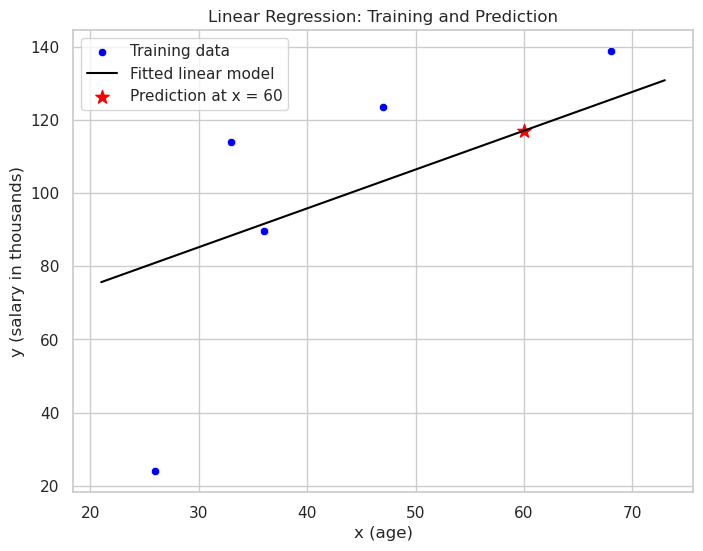


Summary of Results and Visualizations:
• Selected best lambda: 1.0
• Fitted model parameters: theta = 0.3861, theta_0 = -0.0000
• Predicted salary at age 60: 117.052 thousand
• Plotted training data, fitted model, and prediction


In [3]:
import math
import seaborn as sns
import matplotlib.pyplot as plt
from random import shuffle

# Set Seaborn style for better visuals
sns.set(style="whitegrid")

# --- Data from Table 8.2 ---
# Age (x_n) and Annual Salary (y_n in thousands)
data = [
    (36, 89.563),  # Aditya
    (47, 123.543),  # Bob
    (26, 23.989),  # Chloé
    (68, 138.769),  # Daisuke
    (33, 113.888),  # Elisabeth
]

# --- Data Preprocessing ---
def standardize(data_list):
    """Standardize a list to have mean 0 and variance 1."""
    n = len(data_list)
    mean = sum(data_list) / n
    variance = sum((x - mean) ** 2 for x in data_list) / n
    std_dev = math.sqrt(variance) if variance > 0 else 1
    return [(x - mean) / std_dev for x in data_list], mean, std_dev

# Extract x (age) and y (salary)
x_values = [row[0] for row in data]
y_values = [row[1] for row in data]

# Standardize features
x_std, x_mean, x_std_dev = standardize(x_values)
y_std, y_mean, y_std_dev = standardize(y_values)

# Combine standardized data
std_data = list(zip(x_std, y_std))

# --- Training/Parameter Estimation (Empirical Risk Minimization) ---
def fit_linear_model(x, y, lambda_reg=0):
    """
    Fit a linear model f(x) = theta * x + theta_0 using least squares with L2 regularization.
    Returns theta, theta_0.
    """
    n = len(x)
    sum_x = sum(x)
    sum_y = sum(y)
    sum_xy = sum(xi * yi for xi, yi in zip(x, y))
    sum_xx = sum(xi * xi for xi in x)
    
    # Add L2 regularization term: theta minimizes (sum(yi - theta * xi - theta_0)^2 + lambda * theta^2)
    denom = sum_xx + lambda_reg * n - sum_x * sum_x / n
    if abs(denom) < 1e-10:
        theta = 0
    else:
        theta = (sum_xy - sum_x * sum_y / n) / denom
    
    # Solve for theta_0: mean_y - theta * mean_x
    theta_0 = sum_y / n - theta * sum_x / n
    
    return theta, theta_0

def predict(x, theta, theta_0, x_mean, x_std_dev, y_mean, y_std_dev):
    """Predict y for a given x, unstandardizing the result."""
    x_std = (x - x_mean) / x_std_dev
    y_std = theta * x_std + theta_0
    y = y_std * y_std_dev + y_mean
    return y

# --- Cross-Validation ---
def mean_squared_error(y_true, y_pred):
    """Compute mean squared error."""
    n = len(y_true)
    return sum((yt - yp) ** 2 for yt, yp in zip(y_true, y_pred)) / n

def k_fold_cross_validation(data, k, lambda_reg):
    """
    Perform k-fold cross-validation to evaluate the model.
    Returns average validation MSE.
    """
    shuffle(data)  # Randomly shuffle data
    fold_size = len(data) // k
    mse_scores = []
    
    for i in range(k):
        # Split into training and validation sets
        val_start = i * fold_size
        val_end = (i + 1) * fold_size if i < k - 1 else len(data)
        val_data = data[val_start:val_end]
        train_data = data[:val_start] + data[val_end:]
        
        # Extract x and y
        x_train = [d[0] for d in train_data]
        y_train = [d[1] for d in train_data]
        x_val = [d[0] for d in val_data]
        y_val = [d[1] for d in val_data]
        
        # Fit model on training data
        theta, theta_0 = fit_linear_model(x_train, y_train, lambda_reg)
        
        # Predict on validation data
        y_pred = [theta * x + theta_0 for x in x_val]
        
        # Compute MSE
        mse = mean_squared_error(y_val, y_pred)
        mse_scores.append(mse)
    
    return sum(mse_scores) / len(mse_scores)

# --- Nested Cross-Validation for Hyperparameter Tuning ---
def nested_cross_validation(data, k_outer, k_inner, lambda_candidates):
    """
    Perform nested cross-validation to select the best lambda (regularization parameter).
    Returns the best lambda and its average outer-loop MSE.
    """
    shuffle(data)
    outer_fold_size = len(data) // k_outer
    outer_mse_scores = {lambda_reg: [] for lambda_reg in lambda_candidates}
    
    for i in range(k_outer):
        # Split into outer training and test sets
        test_start = i * outer_fold_size
        test_end = (i + 1) * outer_fold_size if i < k_outer - 1 else len(data)
        test_data = data[test_start:test_end]
        outer_train_data = data[:test_start] + data[test_end:]
        
        # Inner loop: select best lambda using k_inner-fold CV
        inner_mse_scores = []
        for lambda_reg in lambda_candidates:
            mse = k_fold_cross_validation(outer_train_data, k_inner, lambda_reg)
            inner_mse_scores.append((mse, lambda_reg))
        
        # Select best lambda
        best_lambda = min(inner_mse_scores, key=lambda x: x[0])[1]
        
        # Train on outer training data with best lambda
        x_outer_train = [d[0] for d in outer_train_data]
        y_outer_train = [d[1] for d in outer_train_data]
        theta, theta_0 = fit_linear_model(x_outer_train, y_outer_train, best_lambda)
        
        # Evaluate on test data
        x_test = [d[0] for d in test_data]
        y_test = [d[1] for d in test_data]
        y_pred = [theta * x + theta_0 for x in x_test]
        mse = mean_squared_error(y_test, y_pred)
        outer_mse_scores[best_lambda].append(mse)
    
    # Compute average MSE for each lambda
    avg_mse = {lambda_reg: (sum(scores) / len(scores) if scores else float('inf'))
               for lambda_reg, scores in outer_mse_scores.items()}
    best_lambda = min(avg_mse, key=avg_mse.get)
    return best_lambda, avg_mse[best_lambda]

# --- Main Demonstration ---
def demonstrate_learning_phases():
    """Demonstrate the three phases of machine learning."""
    print("=== Machine Learning Phases Demonstration ===")
    print("Section 8.1.4: Learning is Finding Parameters\n")

    # Phase 3: Hyperparameter Tuning/Model Selection
    print("Phase 3: Hyperparameter Tuning/Model Selection")
    lambda_candidates = [0, 0.1, 0.5, 1.0]
    k_outer = 3
    k_inner = 2
    best_lambda, avg_mse = nested_cross_validation(std_data, k_outer, k_inner, lambda_candidates)
    print(f"Best regularization parameter (lambda): {best_lambda}")
    print(f"Average MSE from nested cross-validation: {avg_mse:.4f}\n")
    
    # Phase 2: Training/Parameter Estimation
    print("Phase 2: Training/Parameter Estimation")
    theta, theta_0 = fit_linear_model(x_std, y_std, best_lambda)
    print(f"Fitted parameters: theta = {theta:.4f}, theta_0 = {theta_0:.4f}\n")
    
    # Phase 1: Prediction/Inference
    print("Phase 1: Prediction/Inference")
    x_query = 60
    y_pred = predict(x_query, theta, theta_0, x_mean, x_std_dev, y_mean, y_std_dev)
    print(f"Prediction at x = {x_query}: y = {y_pred:.3f} thousand\n")
    
    return theta, theta_0, best_lambda, x_query, y_pred

# --- Plotting Function ---
def plot_results(theta, theta_0, x_query, y_pred):
    """Plot the training data, fitted model, and prediction."""
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x_values, y=y_values, color="blue", label="Training data")
    
    # Plot the linear fit
    x_range = [min(x_values) - 5, max(x_values) + 5]
    y_fit = [predict(x, theta, theta_0, x_mean, x_std_dev, y_mean, y_std_dev) for x in x_range]
    sns.lineplot(x=x_range, y=y_fit, color="black", label="Fitted linear model")
    
    # Mark prediction at x = 60
    plt.scatter([x_query], [y_pred], color="red", s=100, marker="*", label=f"Prediction at x = {x_query}")
    plt.title("Linear Regression: Training and Prediction")
    plt.xlabel("x (age)")
    plt.ylabel("y (salary in thousands)")
    plt.legend()
    plt.show()

# --- Main Execution ---
if __name__ == "__main__":
    print("Machine Learning Phases Demonstration with Seaborn Plotting")
    print("=" * 60)

    # Demonstrate the three phases
    theta, theta_0, best_lambda, x_query, y_pred = demonstrate_learning_phases()

    # Plot the results
    print("Plotting Training Data, Fitted Model, and Prediction")
    plot_results(theta, theta_0, x_query, y_pred)

    print("\n" + "=" * 60)
    print("Summary of Results and Visualizations:")
    print(f"• Selected best lambda: {best_lambda}")
    print(f"• Fitted model parameters: theta = {theta:.4f}, theta_0 = {theta_0:.4f}")
    print(f"• Predicted salary at age {x_query}: {y_pred:.3f} thousand")
    print("• Plotted training data, fitted model, and prediction")